## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df= pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice=len(mouse_study_df["Mouse ID"].unique())
mice

249

In [3]:
# # # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=mouse_study_df.loc[mouse_study_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = mouse_study_df['Mouse ID'] =='g989'
duplicate_mouse

duplicate_data = mouse_study_df.loc[duplicate_mouse]
duplicate_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# #Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=mouse_study_df["Mouse ID"]!="g989"
clean_data
clean_data_df= mouse_study_df[clean_data==True]
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_no=len(clean_data_df["Mouse ID"].unique())
mice_no

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
#TMV= Tumor Volume
mean= clean_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median= clean_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance=clean_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviation=clean_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem=clean_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_stat_table=pd.DataFrame({"Mean TMV":mean,
                                "Median TMV":median,
                                "Variance TMV":variance,
                                "STD TMV":standard_deviation,
                                "Sem TMV":sem})
summary_stat_table

,Mean TMV,Median TMV,Variance TMV,STD TMV,Sem TMV
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# # This method produces everything in a single groupby function
# mean= clean_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
# median= clean_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
# variance=clean_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
# standard_deviation=clean_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
# sem=clean_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# summary_stat_table=pd.DataFrame({"Mean TMV":mean,
#                                 "Median TMV":median,
#                                 "Variance TMV":variance,
#                                 "STD TMV":standard_deviation,
#                                 "Sem TMV":sem})
# summary_stat_table

# clean_data_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","variance","standard_deviation","sem"]})


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Point')

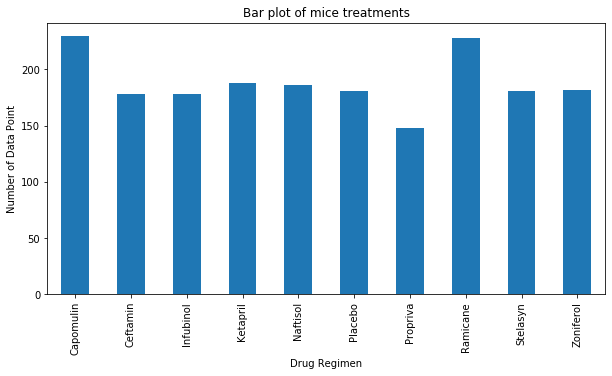

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treatment_bar=clean_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_treatment_bar

mice_treatment_bar.plot(kind="bar",figsize=(10,5))
plt.title("Bar plot of mice treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Point")

In [10]:
mice_treatment_bar=clean_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_treatment_bar

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

(0, 250)

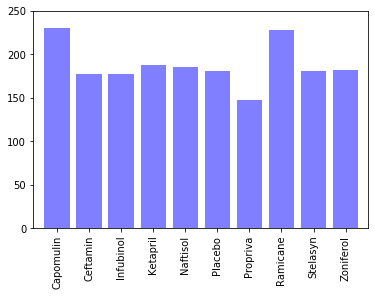

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#generare array from mice_treatment_bar
mice_treatment_array=[230,178,178,188,186,181,148,228,181,182]
x_axis=np.arange(len(mice_treatment_bar))
plt.bar(x_axis, mice_treatment_array, color= "b", align="center", alpha = 0.5)
tick_locations= [x for x in x_axis]
plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.3)
plt.ylim(0, max(mice_treatment_bar)+ 20)


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
female_male=clean_data_df["Sex"].value_counts()
female_male.head()
colors=["lightcoral","blue"]
plot=female_male.plot.pie(y="female",figsize=(5,7), colors=colors, startangle=180,explode=explode, shadow= True,autopct= "%.1f%%")

NameError: name 'explode' is not defined

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_male=clean_data_df["Sex"].value_counts()
female_male.head()

labels=["Female","Male"]
sizes=[922,958]
colors=["blue","lightcoral"]
explode=[0.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=180)
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
#Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df=clean_data_df.loc[clean_data_df["Drug Regimen"]=="Capomulin",:]
capomulin_df






# treatment_regimen=clean_data_df[clean_data_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
# treatment_regimen=treatment_regimen.sort_values(["Timepoint"], ascending=True)
# treatment_regimen

# treatment_regimen_df = pd.merge(treatment_regimen,clean_data_df, on=("Mouse ID","Timepoint"),how="left")
# treatment_regimen_df.head()

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last=capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_volume=pd.DataFrame(capomulin_last)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_capomulin_df=pd.merge(capomulin_volume,clean_data_df,on=("Mouse ID","Timepoint"),how="left")
new_capomulin_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin_tumor = new_capomulin_df["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = capomulin_tumor.quantile([.25,.5,.75])
lowerquartile = quartiles[0.25]
upperquartile = quartiles[0.75]
iqr = upperquartile-lowerquartile    
# Determine outliers using upper and lower bounds
capomulin_lower_bound = lowerquartile - (1.5*iqr)
capomulin_upper_bound = upperquartile + (1.5*iqr)
print(f"{capomulin_lower_bound} & {capomulin_upper_bound} are the outlier")

20.70456164999999 & 51.83201549 are the outlier


In [53]:
ramicane_df=clean_data_df.loc[clean_data_df["Drug Regimen"]=="Ramicane",:]
ramicane_df
ramicane_last=ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_volume=pd.DataFrame(ramicane_last)
ramicane_volume
new_ramicane_df=pd.merge(ramicane_volume,clean_data_df,on=("Mouse ID","Timepoint"),how="left")
new_ramicane_df.head()

ramicane_tumor=new_ramicane_df["Tumor Volume (mm3)"]
ramicane_quartiles = ramicane_tumor.quantile([.25,.5,.75])
ramicane_lowerquartile = ramicane_quartiles[0.25]
ramicane_upperquartile = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperquartile-ramicane_lowerquartile 
ramicane_lower_bound = ramicane_lowerquartile - (1.5*iqr)
ramicane_upper_bound = ramicane_upperquartile + (1.5*iqr)
print(f"{ramicane_lower_bound} & {ramicane_upper_bound} are the outlier")


19.887674359999995 & 52.33180146000001 are the outlier


In [54]:
infubinol_df=clean_data_df.loc[clean_data_df["Drug Regimen"]=="Infubinol",:]
infubinol_df
infubinol_last=infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_volume=pd.DataFrame(infubinol_last)
infubinol_volume
new_infubinol_df=pd.merge(infubinol_volume,clean_data_df,on=("Mouse ID","Timepoint"),how="left")
new_infubinol_df.head()

infubinol_tumor=new_infubinol_df["Tumor Volume (mm3)"]
infubinol_quartiles = infubinol_tumor.quantile([.25,.5,.75])
infubinol_lowerquartile = infubinol_quartiles[0.25]
infubinol_upperquartile = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperquartile-infubinol_lowerquartile 
infubinol_lower_bound = infubinol_lowerquartile - (1.5*iqr)
infubinol_upper_bound = infubinol_upperquartile + (1.5*iqr)
print(f"{infubinol_lower_bound} & {infubinol_upper_bound} are the outlier")



42.375812499999995 & 77.19853804 are the outlier


In [56]:
ceftamin_df=clean_data_df.loc[clean_data_df["Drug Regimen"]=="Ceftamin",:]
ceftamin_df

ceftamin_last=ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_volume=pd.DataFrame(ceftamin_last)
ceftamin_volume
new_ceftamin_df=pd.merge(ceftamin_volume,clean_data_df,on=("Mouse ID","Timepoint"),how="left")
new_ceftamin_df.head()

ceftamin_tumor=new_ceftamin_df["Tumor Volume (mm3)"]
ceftamin_quartiles = ceftamin_tumor.quantile([.25,.5,.75])
ceftamin_lowerquartile = ceftamin_quartiles[0.25]
ceftamin_upperquartile = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperquartile-ceftamin_lowerquartile 
ceftamin_lower_bound = ceftamin_lowerquartile - (1.5*iqr)
ceftamin_upper_bound = ceftamin_upperquartile + (1.5*iqr)
print(f"{ceftamin_lower_bound} & {ceftamin_upper_bound} are the outlier")

37.04928265999999 & 75.97262522 are the outlier


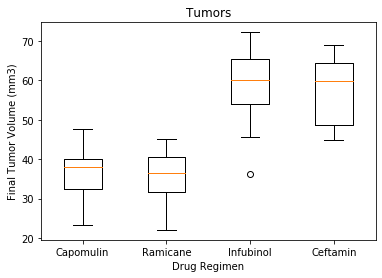

In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plot_data = [capomulin_tumor,ramicane_tumor,infubinol_tumor,ceftamin_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(plot_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


# treated_mouse=clean_data_df[clean_data_df["Mouse ID"].isin(["i509"])]
# treated_mouse
# treated_mouse_data=treated_mouse[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
# treated_mouse_data
# line_plot=treated_mouse_data.reset_index()
# line_plot
# new_line_plot=line_plot[["Timepoint","Tumor Volume (mm3)"]]
# new_line_plot
# line=new_line_plot.plot.line()


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
